In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
files = glob.glob('data-to-use/*.csv')

In [3]:
df_feb = df_march = df_jan = df_2019 = df_jan_march = pd.DataFrame(columns=pd.read_csv(files[0]).columns)
for f in files:
    df = pd.read_csv(f)
    df_feb = df_feb.append(df[(df.years == 2020) & (df.months == 2)], ignore_index=True)
    df_march = df_march.append(df[(df.years == 2020) & (df.months == 3)], ignore_index=True)
    df_jan = df_jan.append(df[(df.years == 2020) & (df.months == 1)], ignore_index=True)
    df_2019 = df_jan_march.append(df[(df.years == 2019)], ignore_index=True)
    df_jan_march = df_feb.append(df[(df.years == 2020) & (df.months < 4)], ignore_index=True)

In [4]:
df_jan_march

,Unnamed: 0,Unnamed: 0.1,ratings,action,categories,dislikes,likes,durations,view_cnts,years,months,days,hours,minutes,weekdays,link,titles,source,query,datetime
0,900,900,4.903648,Watched,['Science & Technology'],478.0,19366.0,387.0,392936.0,2020,2,1,8,6,5,https://www.youtube.com/watch?v=qol3lIY5j4U,This Chinese CPU could be GOOD?!,youtube,NaN,2020-02-01 08:06:00
1,899,899,NaN,Searched,NaN,NaN,NaN,NaN,NaN,2020,2,1,8,6,5,https://www.youtube.com/results?search_query=t...,NaN,youtube,NaN,2020-02-01 08:06:00
2,898,898,4.944050,Watched,['Sports'],4594.0,323843.0,1616.0,11345878.0,2020,2,1,8,12,5,https://www.youtube.com/watch?v=jGHQr2yy_4U,Los Angeles Lakers Pay Tribute To Kobe Bryant,youtube,NaN,2020-02-01 08:12:00
3,6610,1959,NaN,Searched,[],NaN,NaN,NaN,NaN,2020,2,1,9,7,5,NaN,NaN,search,nyc housing lottery,2020-02-01 09:07:00
4,6609,1958,NaN,Visited,[],NaN,NaN,NaN,NaN,2020,2,1,9,14,5,NaN,NaN,search,Affordable Rental and Homeownership Opportunit...,2020-02-01 09:14:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62201,4603,4,NaN,Searched,[['/Arts & Entertainment/TV & Video/TV Shows &...,NaN,NaN,NaN,NaN,2020,3,16,16,49,0,NaN,NaN,search,gac closed ur,2020-03-16 16:49:00
62202,4602,3,NaN,Visited,[],NaN,NaN,NaN,NaN,2020,3,16,16,49,0,NaN,NaN,search,The Steamies: UR's best (and worst) showers on...,2020-03-16 16:49:00
62203,4600,1,NaN,Visited,[],NaN,NaN,NaN,NaN,2020,3,16,16,58,0,NaN,NaN,search,This is your captain speaking speaker - New Yo...,2020-03-16 16:58:00
62204,4601,2,NaN,Searched,[],NaN,NaN,NaN,NaN,2020,3,16,16,58,0,NaN,NaN,search,this is your captains speaking speakers,2020-03-16 16:58:00


Text(0.5, 1.0, 'Percentages of Key Search Terms By Week (January-March 2020)')

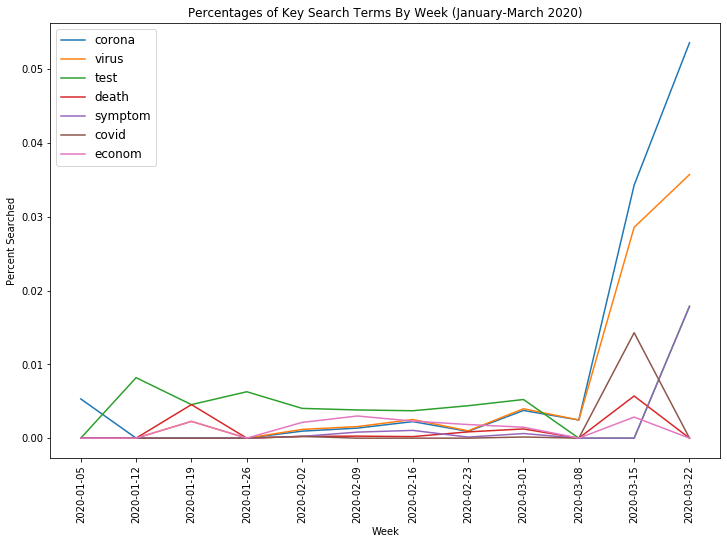

In [80]:
df_jan_march['datetime']= pd.to_datetime(df_jan_march['datetime'])
d = {
    'corona': 0,
    'virus': 1,
    'test': 2,
    'death': 3,
    'symptom': 4,
    'covid': 5,
    'econom': 6
}

d2 = {
    0: 'corona',
    1: 'virus',
    2: 'test',
    3: 'death',
    4: 'symptom',
    5: 'covid',
    6: 'econom'
}

history = []
weekly_totals = []
labels = [] 
for week, wdf in df_jan_march.set_index('datetime').groupby(pd.Grouper(freq='W')):
    if len(wdf) >0:
        wdist = [0 for i in range(7)]
        week_label = str(week).split(' ')[0]
        labels.append(week_label)
        weekly_totals.append(len(wdf))
#         print(week_label, len(wdf))
        weekly_queries = [str(q).lower() for q in wdf['query'].values.tolist()]
        for q in weekly_queries:
            if 'corona' in q:
                wdist[d['corona']]+=1
            if 'virus' in q:
                wdist[d['virus']]+=1
            if 'test' in q:
                wdist[d['test']]+=1
            if 'death' in q:
                wdist[d['death']]+=1
            if 'symptom' in q:
                wdist[d['symptom']]+=1
            if 'covid' in q:
                wdist[d['covid']]+=1
            if 'econom' in q:
                wdist[d['econom']]+=1
        history.append(wdist)
# print(weekly_totals)
history = np.array(history)
# print(history)
norm_hist = np.zeros((len(history), len(history[0])))
for i in range(len(history)):
    factor = weekly_totals[i]
    for j in range(len(history[0])):
        norm_hist[i][j] = float(history[i][j])/float(factor)
#         print(i,j,norm_hist[i][j],factor)


# print(history)
plt.figure(figsize=(12, 8))
for col in range(history.shape[1]):
    name = d2[col]
    y = norm_hist[:,col]
    plt.plot(range(len(y)),y,label=name)

plt.xticks(range(len(labels)),labels, rotation=90)
plt.legend(fontsize = 12)
plt.xlabel('Week')
plt.ylabel('Percent Searched')
plt.title("Percentages of Key Search Terms By Week (January-March 2020)")

Text(0.5, 1.0, 'Percentages of Key Search Terms (Places) By Week (January-March 2020)')

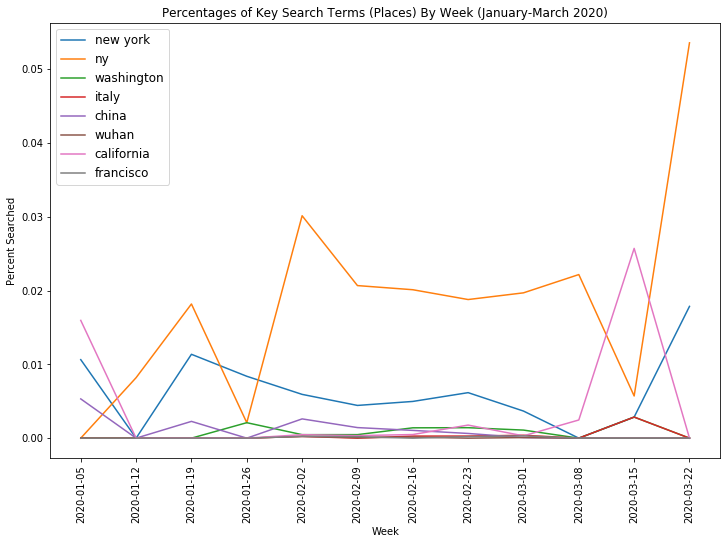

In [81]:
df_jan_march['datetime']= pd.to_datetime(df_jan_march['datetime'])
d_place = {
    'new york': 0,
    'ny': 1,
    'washington': 2,
    'italy': 3,
    'china': 4,
    'wuhan': 5,
    'california': 6,
    'francisco': 7
}

d2_place = {
    0: 'new york',
    1: 'ny',
    2: 'washington',
    3: 'italy',
    4: 'china',
    5: 'wuhan',
    6: 'california',
    7: 'francisco'
}

history_place = []
weekly_totals_place = []
labels_place = [] 
for week, wdf_place in df_jan_march.set_index('datetime').groupby(pd.Grouper(freq='W')):
    if len(wdf_place) >0:
        wdist_place = [0 for i in range(8)]
        week_label_place = str(week).split(' ')[0]
        labels_place.append(week_label_place)
        weekly_totals_place.append(len(wdf_place))
#         print(week_label, len(wdf))
        weekly_queries_place = [str(q).lower() for q in wdf_place['query'].values.tolist()]
        for q in weekly_queries_place:
            if 'new york' in q:
                wdist_place[d_place['new york']]+=1
            if 'ny' in q:
                wdist_place[d_place['ny']]+=1
            if 'washington' in q:
                wdist_place[d_place['washington']]+=1
            if 'italy' in q:
                wdist_place[d_place['italy']]+=1
            if 'china' in q:
                wdist_place[d_place['china']]+=1
            if 'wuhan' in q:
                wdist_place[d_place['wuhan']]+=1
            if 'california' in q:
                wdist_place[d_place['california']]+=1
            if 'francisco' in q:
                wdist_place[d_place['francisco']]+=1
        history_place.append(wdist_place)
        
# print(weekly_totals)
history_place = np.array(history_place)
# print(history)
norm_hist_place = np.zeros((len(history_place), len(history_place[0])))
for i in range(len(history_place)):
    factor_place = weekly_totals_place[i]
    for j in range(len(history_place[0])):
        norm_hist_place[i][j] = float(history_place[i][j])/float(factor_place)
#         print(i,j,norm_hist[i][j],factor)


# print(history)
plt.figure(figsize=(12, 8))
for col in range(history_place.shape[1]):
    name_place = d2_place[col]
    y = norm_hist_place[:,col]
    plt.plot(range(len(y)),y,label=name_place)

plt.xticks(range(len(labels_place)),labels_place, rotation=90)
plt.legend(fontsize = 12)
plt.xlabel('Week')
plt.ylabel('Percent Searched')
plt.title("Percentages of Key Search Terms (Places) By Week (January-March 2020)")

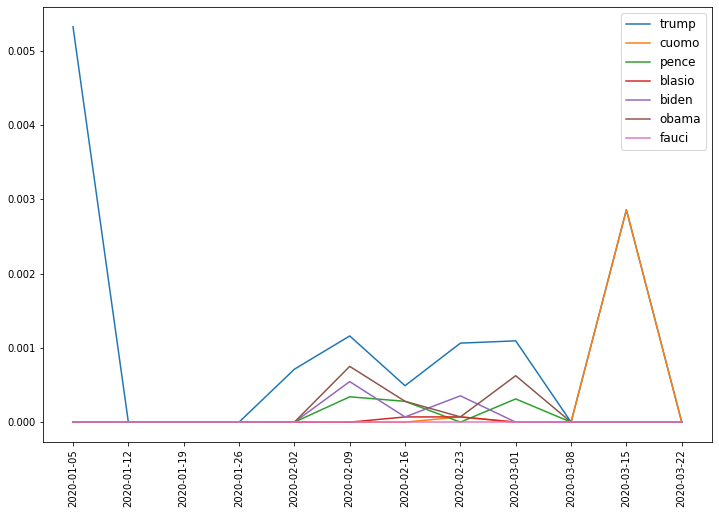

In [79]:
df_jan_march['datetime']= pd.to_datetime(df_jan_march['datetime'])
d_ppl = {
    'trump': 0,
    'cuomo': 1,
    'pence': 2,
    'blasio': 3,
    'biden': 4,
    'obama': 5,
    'fauci': 6
}

d2_ppl = {
    0: 'trump',
    1: 'cuomo',
    2: 'pence',
    3: 'blasio',
    4: 'biden',
    5: 'obama',
    6: 'fauci'
}

history_ppl = []
weekly_totals_ppl = []
labels_ppl = [] 
for week, wdf_ppl in df_jan_march.set_index('datetime').groupby(pd.Grouper(freq='W')):
    if len(wdf_ppl) >0:
        wdist_ppl = [0 for i in range(7)]
        week_label_ppl = str(week).split(' ')[0]
        labels_ppl.append(week_label_ppl)
        weekly_totals_ppl.append(len(wdf_ppl))
#         print(week_label, len(wdf))
        weekly_queries_ppl = [str(q).lower() for q in wdf_ppl['query'].values.tolist()]
        for q in weekly_queries_ppl:
            if 'trump' in q:
                wdist_ppl[d_ppl['trump']]+=1
            if 'cuomo' in q:
                wdist_ppl[d_ppl['cuomo']]+=1
            if 'pence' in q:
                wdist_ppl[d_ppl['pence']]+=1
            if 'blasio' in q:
                wdist_ppl[d_ppl['blasio']]+=1
            if 'biden' in q:
                wdist_ppl[d_ppl['biden']]+=1
            if 'obama' in q:
                wdist_ppl[d_ppl['obama']]+=1
            if 'fauci' in q:
                wdist_ppl[d_ppl['fauci']]+=1
        history_ppl.append(wdist_ppl)
        
# print(weekly_totals)
history_ppl = np.array(history_ppl)
# print(history)
norm_hist_ppl = np.zeros((len(history_ppl), len(history_ppl[0])))
for i in range(len(history_ppl)):
    factor_ppl = weekly_totals_ppl[i]
    for j in range(len(history_ppl[0])):
        norm_hist_ppl[i][j] = float(history_ppl[i][j])/float(factor_ppl)
#         print(i,j,norm_hist[i][j],factor)


# print(history)
plt.figure(figsize=(12, 8))
for col in range(history_ppl.shape[1]):
    name_ppl = d2_ppl[col]
    y = norm_hist_ppl[:,col]
    plt.plot(range(len(y)),y,label=name_ppl)

plt.xticks(range(len(labels_ppl)),labels_ppl, rotation=90)
plt.legend(fontsize = 12)